# Notebook for plotting multiple UMAPs 
(for each method, for different proportions, etc).

In [1]:
import pandas as pd
import scvelo as scv
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib

Get UMAP coordinates to match the full ZF 24hpf full embryo, for the subset adata objects

In [13]:
adata_orig=sc.read_h5ad('/zebrahub_24hrs_dataset/scVelo_stochastic_Jun22.h5ad')

In [14]:
adata_orig

AnnData object with n_obs × n_vars = 12914 × 1959
    obs: 'clusters', 'seurat_clusters', 'timepoint', 'zebrafish_anatomy_ontology_class', 'n_genes', 'n_counts', 'fish', 'leiden', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'velocity_self_transition'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'seurat_clusters_colors', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'counts', 'spliced', 'unspliced', 'variance_velocity', 'velocity'
    obsp: 'connectivities', 'distances'

In [15]:
umap = adata_orig.obsm['X_umap']
cell_ids = adata_orig.obs.index.to_list()

# Create a DataFrame with cell IDs and their corresponding UMAP coordinates
coord_df = pd.DataFrame(umap, index=cell_ids, columns=['UMAP_1', 'UMAP_2'])

Function that matches the UMAP coordinates for the corresponding cell IDs

In [18]:
def get_umap_coods(coord_df, adatalist=[]):
    # Reorder the DataFrame according to the cell IDs of the new object
    
    for adata in adatalist:
        reordered_coords = coord_df.loc[adata.obs.index].values

        # Assign the reordered UMAP coordinates to the new AnnData object
        adata.obsm['X_umap'] = reordered_coords


Function to multiplot multiple UMAPs for multiple adata objects

In [24]:
def plot_velocity_embedding_streams(adata_list, method, prop_list, basis="umap", color="clusters", dpi=150):
    # Number of panels based on the number of adata objects
    n_cols = len(adata_list)
    fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 5), sharex=True, sharey=True, dpi=dpi)

    for i, adata in enumerate(adata_list):
        ax = axes[i]
        scv.pl.velocity_embedding_stream(
            adata,
            basis=basis,
            color=color,
            legend_loc='none',
            ax=ax,           # Use the predefined axis
            show=False,      # Prevent showing the plot immediately
            legend_fontsize=9,
            dpi=dpi
        )
        #ax.set_title(method+' Velocity UMAP ' +str(prop_list[i]))  # Optionally set titles
        ax.set_title(method+str(prop_list[i]))  # Optionally set titles
        #ax.set_xlabel('UMAP 1')  # Set X-axis label
        #ax.set_ylabel('UMAP 2')  # Set Y-axis label
        # Rasterizing the content inside each subplot
        for child in ax.get_children():
            if isinstance(child, matplotlib.collections.Collection):
                child.set_rasterized(True)

    plt.tight_layout()
    return fig, axes

## Plot velocity embedding streams for each method, at different subset levels

In [25]:
#DeepVelo subset adatas

dv_02=sc.read_h5ad('/velocity_subsets_zf24hpf/deepvelo/allfish_0.02-1-deepvelo.h5ad')
dv_50=sc.read_h5ad('/velocity_subsets_zf24hpf/deepvelo/allfish_0.5-1-deepvelo.h5ad')
dv_05=sc.read_h5ad('/velocity_subsets_zf24hpf/deepvelo/allfish_0.05-1-deepvelo.h5ad')
dv_12=sc.read_h5ad('/velocity_subsets_zf24hpf/deepvelo/allfish_0.12-1-deepvelo.h5ad')
dv_80=sc.read_h5ad('/velocity_subsets_zf24hpf/deepvelo/allfish_0.8-1-deepvelo.h5ad')
dv_25=sc.read_h5ad('/velocity_subsets_zf24hpf/deepvelo/allfish_0.25-1-deepvelo.h5ad')
dv_95=sc.read_h5ad('/velocity_subsets_zf24hpf/deepvelo/allfish_0.95-1-deepvelo.h5ad')
dv_1=sc.read_h5ad('/velocity_subsets_zf24hpf/deepvelo/allfish_1-1-deepvelo.h5ad')

In [26]:
#scVelo Dynamic

dyn_02=sc.read_h5ad('/velocity_subsets_zf24hpf/scvelo-dynamical/allfish_0.02-1-scvelo-dynamical.h5ad')
dyn_05=sc.read_h5ad('/velocity_subsets_zf24hpf/scvelo-dynamical/allfish_0.05-1-scvelo-dynamical.h5ad')
dyn_12=sc.read_h5ad('/velocity_subsets_zf24hpf/scvelo-dynamical/allfish_0.12-1-scvelo-dynamical.h5ad')
dyn_25=sc.read_h5ad('/velocity_subsets_zf24hpf/scvelo-dynamical/allfish_0.25-1-scvelo-dynamical.h5ad')
dyn_50=sc.read_h5ad('/velocity_subsets_zf24hpf/scvelo-dynamical/allfish_0.5-1-scvelo-dynamical.h5ad')
dyn_80=sc.read_h5ad('/velocity_subsets_zf24hpf/scvelo-dynamical/allfish_0.8-1-scvelo-dynamical.h5ad')
dyn_95=sc.read_h5ad('/velocity_subsets_zf24hpf/scvelo-dynamical/allfish_0.95-1-scvelo-dynamical.h5ad')
dyn_1=sc.read_h5ad('/velocity_subsets_zf24hpf/scvelo-dynamical/allfish_1-1-scvelo-dynamical.h5ad')

In [67]:
save_path='/figures/subset_bam/'

Create a list of adata objects and transfer over the corresponding UMAP coordinates

In [27]:
scv_dynamical_adatas=[dyn_02, dyn_05, dyn_12, dyn_25, dyn_50, dyn_80, dyn_95, dyn_1]

In [28]:
get_umap_coods(coord_df, scv_dynamical_adatas)

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


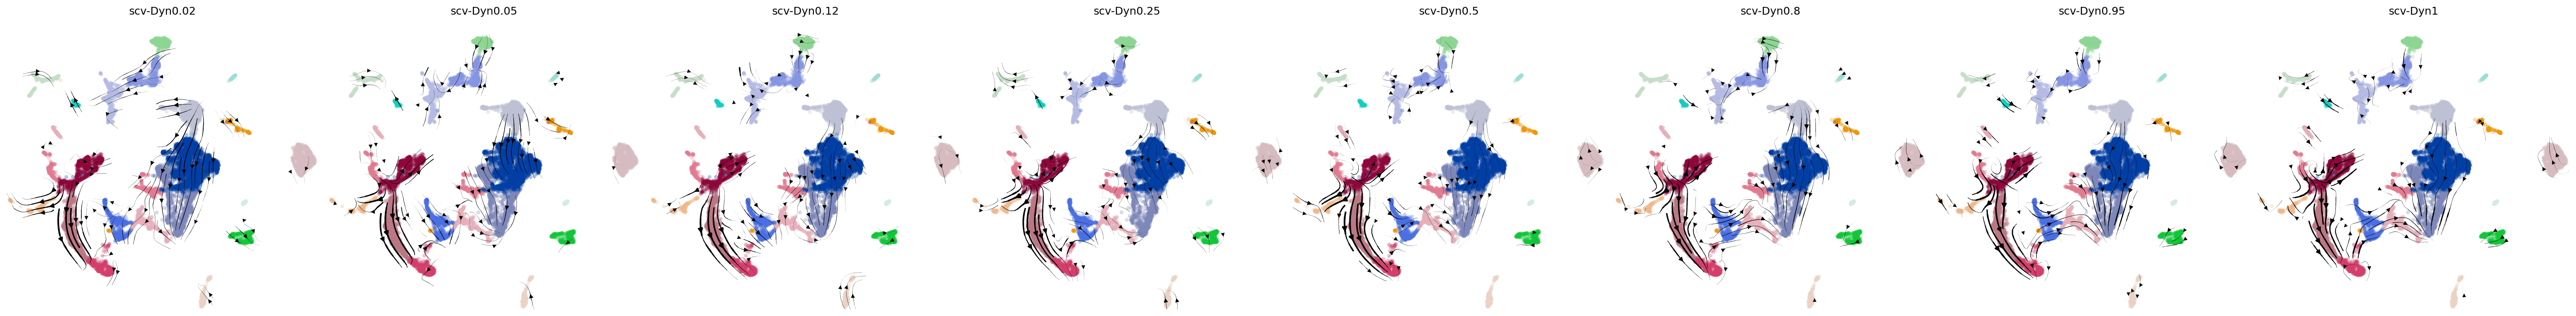

In [31]:
maintitle='scv-Dyn'
prop_list=[0.02, 0.05, 0.12, 0.25, 0.5, 0.8, 0.95, 1]
fig, axes = plot_velocity_embedding_streams(scv_dynamical_adatas, maintitle, prop_list)
#fig.savefig(save_path + 'umaps_correct_scvDyn_embedding_streams_Jun11.svg', dpi=500)
plt.show()


In [29]:
deepvelo_adatas = [dv_02, dv_05, dv_12, dv_25, dv_50, dv_80, dv_95, dv_1]

In [30]:
get_umap_coods(coord_df, deepvelo_adatas)

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


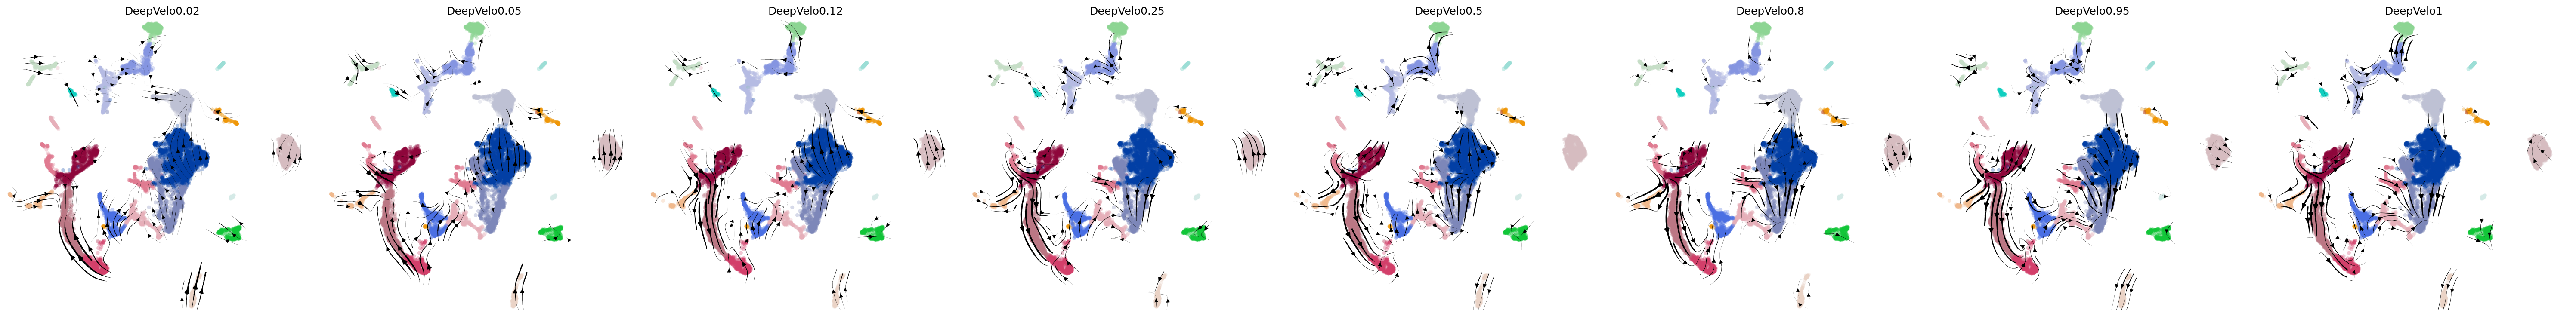

In [32]:
maintitle='DeepVelo'
fig, axes = plot_velocity_embedding_streams(deepvelo_adatas, maintitle, prop_list)

#fig.savefig(save_path + 'umaps_2_velocyto_embedding_streams.svg', dpi=500)

plt.show()



## Plot velocity embedding streams for each dataset, five methods

In [69]:
nmp_deepvel = sc.read_h5ad('/nmp_dataset/deepVelo_Jun22.h5ad')

nmp_scvDet = sc.read_h5ad('/nmp_dataset/scVelo_deterministic_Jun22.h5ad')

nmp_scvDyn = sc.read_h5ad('/nmp_dataset/scVelo_dynamical_Jun22.h5ad')

nmp_scvSto = sc.read_h5ad('/nmp_dataset/scVelo_stochastic_Jun22.h5ad')

nmp_uniTVel = sc.read_h5ad('/nmp_dataset/uniTVelo_Jun22.h5ad')


In [70]:
zf_deepvel = sc.read_h5ad('/zebrahub_24hrs_dataset/deepVelo_Jun22.h5ad')
zf_Det = sc.read_h5ad('/zebrahub_24hrs_dataset/scVelo_deterministic_Jun22.h5ad')
zf_Dyn = sc.read_h5ad('/zebrahub_24hrs_dataset/scVelo_dynamical_Jun22.h5ad')
zf_Sto = sc.read_h5ad('/zebrahub_24hrs_dataset/scVelo_stochastic_Jun22.h5ad')
zf_UniT = sc.read_h5ad('/zebrahub_24hrs_dataset/uniTVelo_Jun22.h5ad')


In [71]:
pan_deepvel= sc.read_h5ad('/pancreas_dataset/deepVelo_Jun22.h5ad')
pan_Det = sc.read_h5ad('/pancreas_dataset/scVelo_deterministic_Jun22.h5ad')
pan_Dyn = sc.read_h5ad('/pancreas_dataset/scVelo_dynamical_Jun22.h5ad')
pan_Sto = sc.read_h5ad('/pancreas_dataset/scVelo_stochastic_Jun22.h5ad')
pan_UniT = sc.read_h5ad('/pancreas_dataset/uniTVelo_Jun22.h5ad')



In [83]:
zf_list = [zf_deepvel, zf_Det, zf_Dyn, zf_Sto, zf_UniT]
zf_title= 'ZF Embryo 24hpf'
method_list = ['DeepVelo', 'Velocyto', 'scv-Dyn', 'scv-Sto', 'UniTVelo']

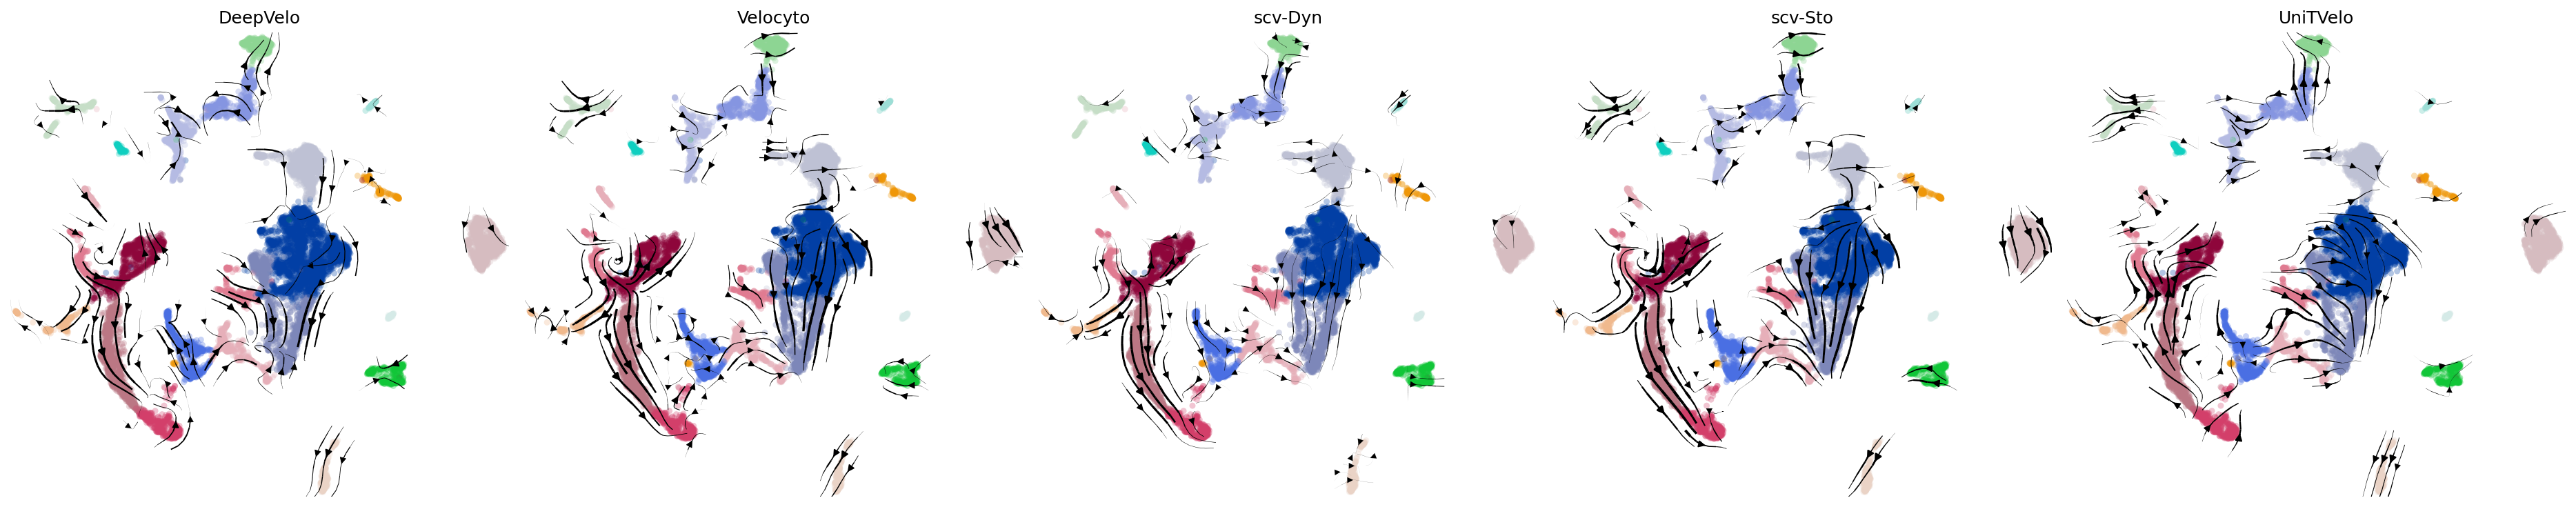

In [88]:
fig, axes = plot_velocity_embedding_streams(zf_list, '', method_list, basis="umap", color="clusters", dpi=150)
fig.savefig(save_path + 'allmethods_zf24hpf_velocityumaps_Jun13.svg', dpi=500)

plt.show()

In [73]:
nmp_list = [nmp_deepvel, nmp_scvDet, nmp_scvDyn, nmp_scvSto, nmp_uniTVel]
title= 'ZF NMP'
method_list = ['DeepVelo', 'Velocyto', 'scv-Dyn', 'scv-Sto', 'UniTVelo']

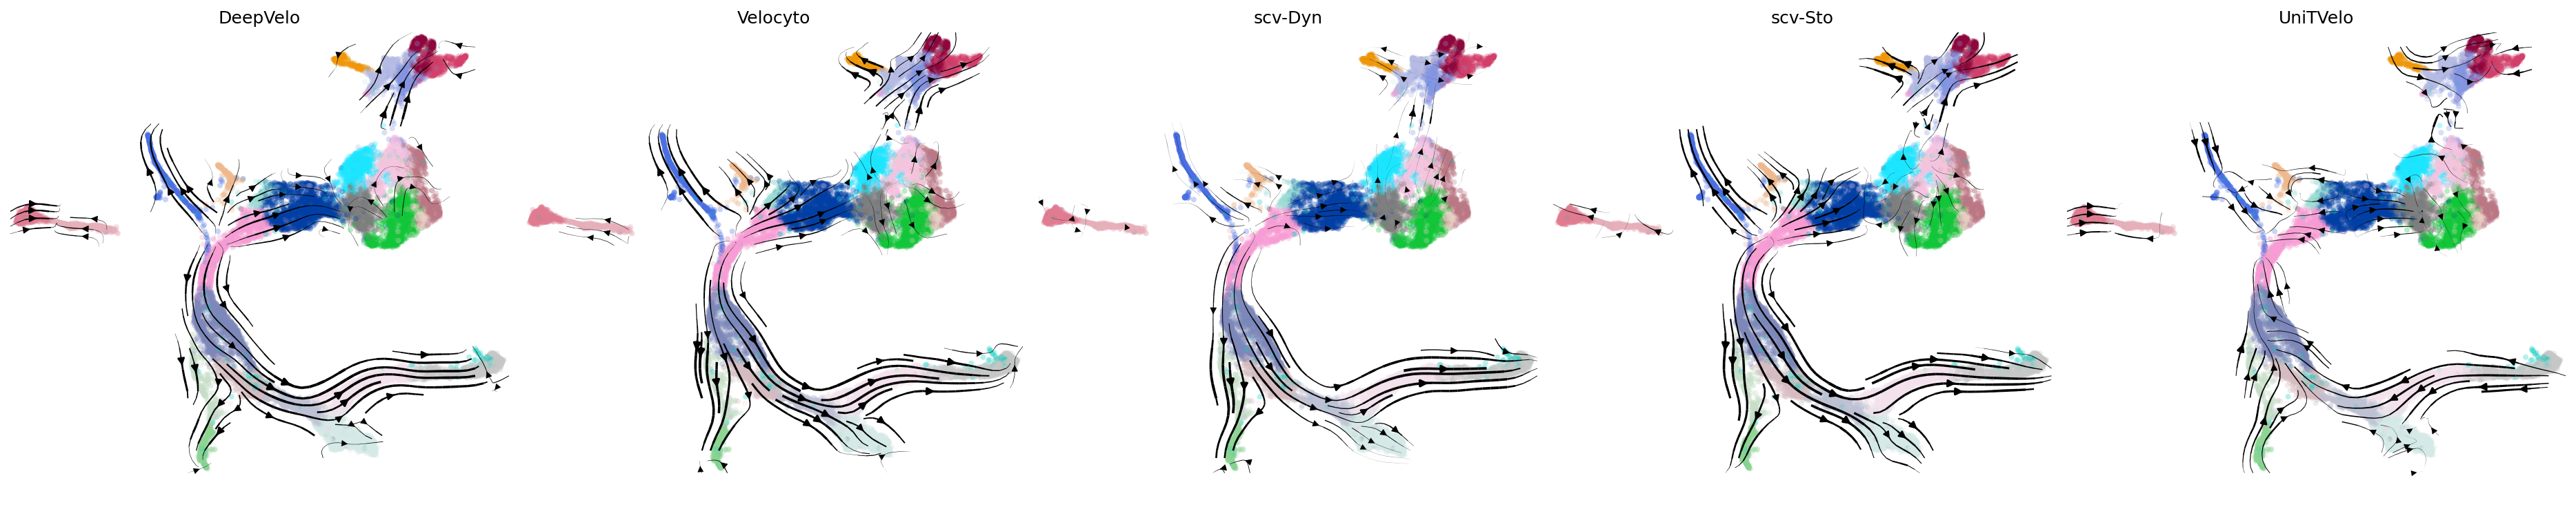

In [90]:
fig, axes = plot_velocity_embedding_streams(nmp_list, '', method_list, basis="umap", color="clusters", dpi=150)
fig.savefig(save_path + 'allmethods_nmp_velocityumaps_Jun13.svg', dpi=500)

plt.show()

In [81]:
pan_list = [pan_deepvel, pan_Det, pan_Dyn, pan_Sto, pan_UniT]
pan_title= 'Pancreas'
method_list = ['DeepVelo', 'Velocyto', 'scv-Dyn', 'scv-Sto', 'UniTVelo']

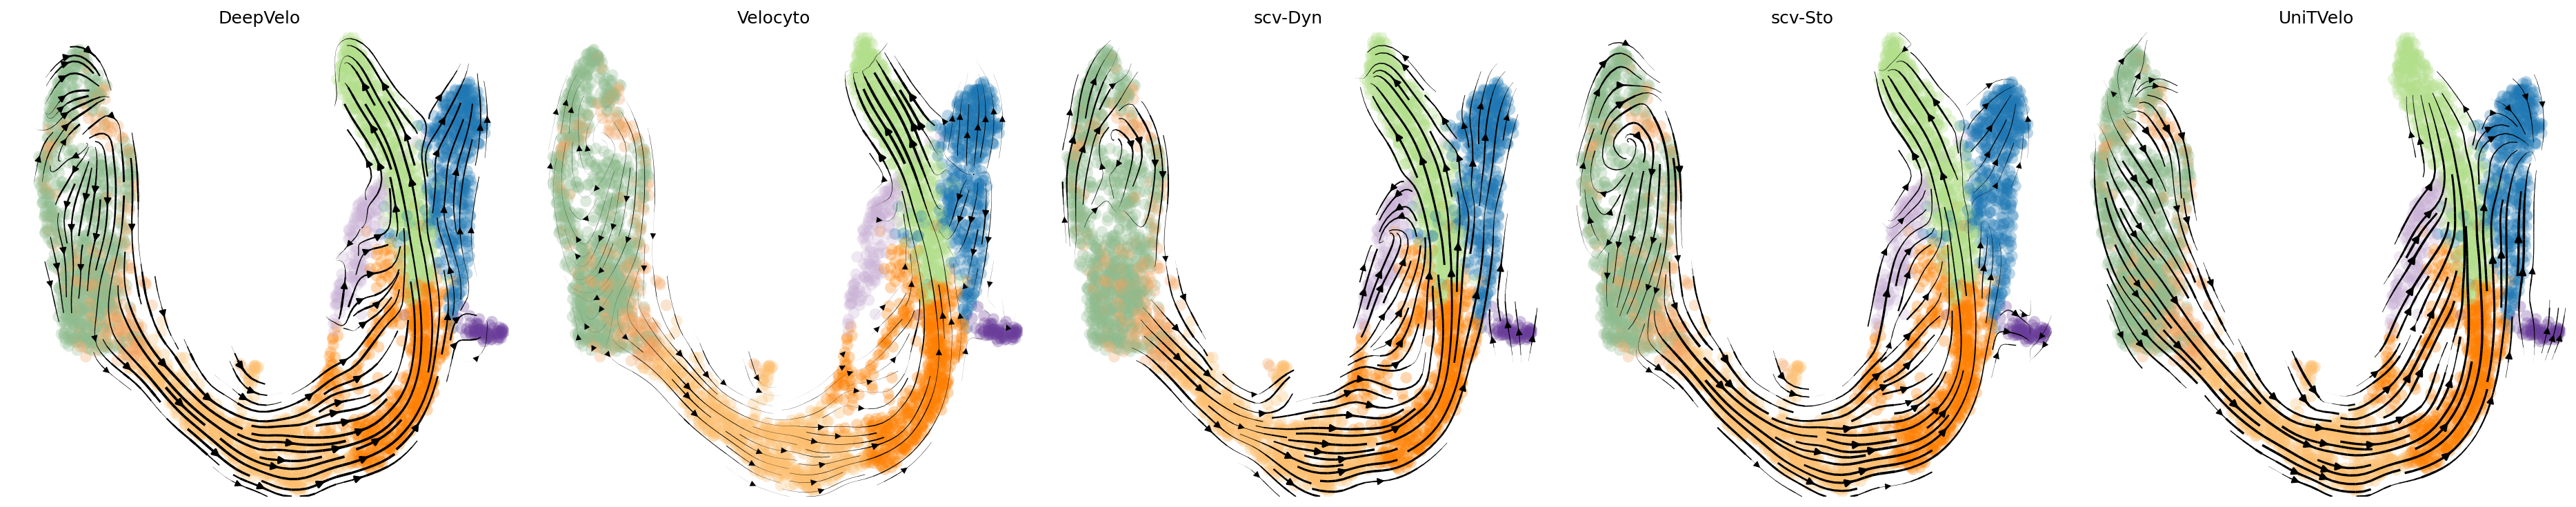

In [91]:
fig, axes = plot_velocity_embedding_streams(pan_list, '', method_list, basis="umap", color="clusters", dpi=150)
fig.savefig(save_path + 'allmethods_pan_velocityumaps_Jun13.svg', dpi=500)

plt.show()

## Plot UMAP colored by cluster variable

/home/sarah.ancheta/miniconda3/envs/vel38zebra/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


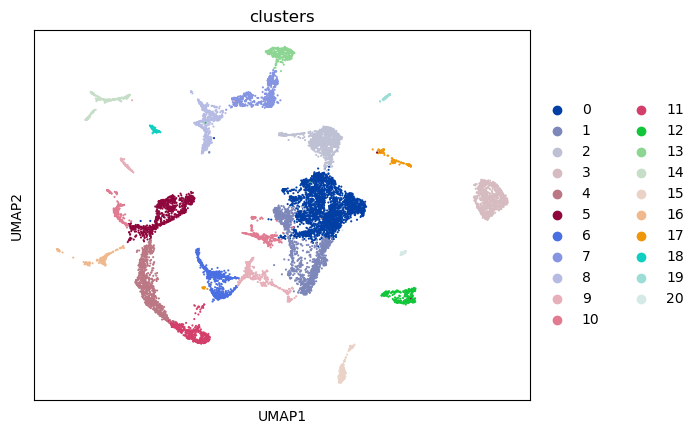

In [56]:
sc.pl.umap(adata_orig, color="clusters")